# Other data sources
http://research.stlouisfed.org/fred2/

http://www.economagic.com

http://www.nber.org/data/

http://www.economicsnetwork.ac.uk/links/data_free

http://finance.yahoo.com

http://quandl.com

https://www.federalreserve.gov/pubs/feds/2006/200628/200628abs.html

http://www.ivo-welch.info/professional/goyal-welch/

https://www.sydneyludvigson.com/data-and-appendixes


# Data Sources
Data sources supported by DataReader:
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [ ]:
import pandas_datareader.data as web  # module for reading datasets directly from the web
from datetime import datetime
# Set start and end date for stock prices
start_date = datetime(2000, 1, 1)
end_date = datetime(2019, 1, 1)

In [ ]:
pip install wbdata

## FRED
https://fred.stlouisfed.org/


<Axes: xlabel='DATE'>

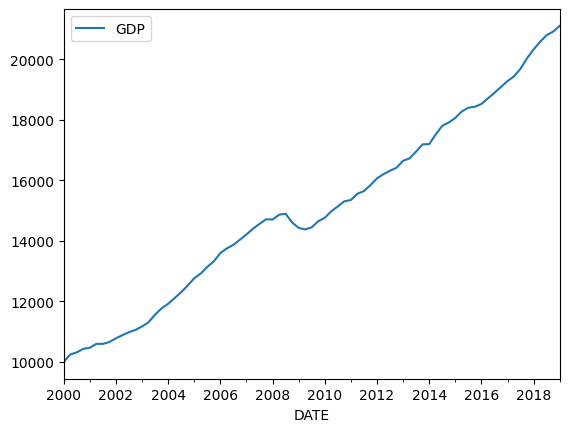

In [ ]:
gdp = web.DataReader('GDP', 'fred', start_date, end_date)
gdp.plot()

## Ken French's research data
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [ ]:
r = web.DataReader('10_Industry_Portfolios', 'famafrench', start=1900)[0]/100

In [ ]:
r.head(-20
    )

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,0.0145,0.1555,0.0469,-0.0118,0.0290,0.0083,0.0011,0.0177,0.0704,0.0213
1926-08,0.0397,0.0368,0.0281,0.0347,0.0266,0.0217,-0.0071,0.0425,-0.0169,0.0435
1926-09,0.0114,0.0480,0.0115,-0.0339,-0.0038,0.0241,0.0021,0.0069,0.0204,0.0029
1926-10,-0.0124,-0.0823,-0.0363,-0.0078,-0.0458,-0.0011,-0.0229,-0.0057,-0.0263,-0.0284
1926-11,0.0520,-0.0019,0.0410,0.0001,0.0471,0.0163,0.0643,0.0542,0.0371,0.0211
...,...,...,...,...,...,...,...,...,...,...
2021-07,0.0021,-0.0096,0.0133,-0.0858,0.0338,0.0033,0.0026,0.0292,0.0297,-0.0042
2021-08,-0.0028,0.0178,0.0055,-0.0119,0.0465,0.0134,0.0238,0.0285,0.0323,0.0259
2021-09,-0.0456,0.0280,-0.0579,0.1099,-0.0622,-0.0558,-0.0420,-0.0601,-0.0486,-0.0226


## World Bank
https://data.worldbank.org/


In [ ]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')

In [ ]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US'], start=2005, end=2008)

In [ ]:
dat.head()

NY.GDP.PCAP.KD
country       year                
United States 2008    53854.160612
              2007    54299.617241
              2006    53738.091725
              2005    52789.731419

# **Part 1**

In [ ]:
import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.famafrench import FamaFrenchReader
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

def fetch_french_dataset_explicitly(dataset_name, start, end):
    reader = FamaFrenchReader(dataset_name, start=start, end=end)
    df = reader.read()[0]  # Fetches the monthly dataset
    return df

start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2019, 12, 31)

dataset_name = "10_Industry_Portfolios"
industries_data = fetch_french_dataset_explicitly(dataset_name, start_date, end_date)

gdp_growth_monthly = web.DataReader("GDP", "fred", start_date, end_date).pct_change().resample('M').mean().dropna()
inflation_rate_monthly = web.DataReader("CPIAUCNS", "fred", start_date, end_date).pct_change().resample('M').mean().dropna()
industrial_production_monthly = web.DataReader("INDPRO", "fred", start_date, end_date).resample('M').mean()

# Fetching new economic data
population_growth_monthly = web.DataReader("SPPOPGROWUSA", "fred", start_date, end_date).resample('M').mean()
unemployment_monthly = web.DataReader("UNRATE", "fred", start_date, end_date).resample('M').mean()
interest_rates_monthly = web.DataReader("FEDFUNDS", "fred", start_date, end_date).resample('M').mean()

sp500_monthly = yf.download('^GSPC', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
ten_year_bond_monthly = yf.download('^TNX', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
us_dollar_index_monthly = yf.download('DX-Y.NYB', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
health_data_monthly = yf.download("XLV", start=start_date, end=end_date).resample('M').mean()

data_monthly = pd.concat([
    gdp_growth_monthly, inflation_rate_monthly, industrial_production_monthly,
    population_growth_monthly, unemployment_monthly, interest_rates_monthly,
    sp500_monthly, ten_year_bond_monthly, us_dollar_index_monthly
], axis=1).dropna()
data_monthly.columns = [
    "GDP Growth", "Inflation Rate", "Industrial Production",
    "Population Growth", "Unemployment", "Interest Rates",
    "S&P 500", "10 Year Bond", "US Dollar Index"
]

data_monthly.index = pd.DatetimeIndex(data_monthly.index)
data_monthly.fillna(method='ffill', inplace=True)

data_monthly["Excess Return"] = (health_data_monthly["Adj Close"].pct_change().dropna() - data_monthly["10 Year Bond"]).dropna()

X1 = data_monthly[[
    "GDP Growth", "Inflation Rate", "Industrial Production",
    "Population Growth", "Unemployment", "Interest Rates",
    "S&P 500", "US Dollar Index"
]]
X1 = sm.add_constant(X1)
y1 = data_monthly["Excess Return"]
model1 = sm.OLS(y1, X1, missing='drop').fit()
print(model1.summary())

X2 = data_monthly[["S&P 500"]]
X2 = sm.add_constant(X2)
y2 = data_monthly["Excess Return"]
model2 = sm.OLS(y2, X2, missing='drop').fit()
print(model2.summary())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:          Excess Return   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     7.092
Date:                Wed, 11 Oct 2023   Prob (F-statistic):            0.00284
Time:                        16:07:46   Log-Likelihood:                -10.244
No. Observations:                  19   AIC:                             38.49
Df Residuals:                      10   BIC:                             46.99
Df Model:                           8                                         
Covariance Ty

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.famafrench import FamaFrenchReader
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

def fetch_french_dataset_explicitly(dataset_name, start, end):
    reader = FamaFrenchReader(dataset_name, start=start, end=end)
    df = reader.read()[0]
    return df

start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2019, 12, 31)

dataset_name = "10_Industry_Portfolios"
industries_data = fetch_french_dataset_explicitly(dataset_name, start_date, end_date)

# Data fetched from fred
gdp_growth_monthly = web.DataReader("GDP", "fred", start_date, end_date).pct_change().resample('M').mean().dropna()
inflation_rate_monthly = web.DataReader("CPIAUCNS", "fred", start_date, end_date).pct_change().resample('M').mean().dropna()
industrial_production_monthly = web.DataReader("INDPRO", "fred", start_date, end_date).resample('M').mean()
population_growth_monthly = web.DataReader("SPPOPGROWUSA", "fred", start_date, end_date).resample('M').mean()
unemployment_monthly = web.DataReader("UNRATE", "fred", start_date, end_date).resample('M').mean()
interest_rates_monthly = web.DataReader("FEDFUNDS", "fred", start_date, end_date).resample('M').mean()

# Data fetched from Yahoo finance
sp500_monthly = yf.download('^GSPC', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
ten_year_bond_monthly = yf.download('^TNX', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
us_dollar_index_monthly = yf.download('DX-Y.NYB', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
nasdaq_composite_monthly = yf.download('^IXIC', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
oil_monthly = yf.download('CL=F', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
gold_monthly = yf.download('GC=F', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
health_data_monthly = yf.download("XLV", start=start_date, end=end_date).resample('M').mean()

data_monthly = pd.concat([
    gdp_growth_monthly, inflation_rate_monthly, industrial_production_monthly,
    population_growth_monthly, unemployment_monthly, interest_rates_monthly,
    sp500_monthly, ten_year_bond_monthly, us_dollar_index_monthly,
    nasdaq_composite_monthly, oil_monthly, gold_monthly
], axis=1).dropna()
data_monthly.columns = [
    "GDP Growth", "Inflation Rate", "Industrial Production",
    "Population Growth", "Unemployment", "Interest Rates",
    "S&P 500", "10 Year Bond", "US Dollar Index",
    "NASDAQ Composite", "Oil", "Gold"
]

data_monthly.index = pd.DatetimeIndex(data_monthly.index)
data_monthly.fillna(method='ffill', inplace=True)

data_monthly["Excess Return"] = (health_data_monthly["Adj Close"].pct_change().dropna() - data_monthly["10 Year Bond"]).dropna()

X1 = data_monthly[[
    "GDP Growth", "Inflation Rate", "Industrial Production",
    "Population Growth", "Unemployment", "Interest Rates",
    "S&P 500", "US Dollar Index", "NASDAQ Composite", "Oil", "Gold"
]]
X1 = sm.add_constant(X1)
y1 = data_monthly["Excess Return"]
model1 = sm.OLS(y1, X1, missing='drop').fit()
print(model1.summary())

X2 = data_monthly[["S&P 500"]]
X2 = sm.add_constant(X2)
y2 = data_monthly["Excess Return"]
model2 = sm.OLS(y2, X2, missing='drop').fit()
print(model2.summary())

correlation_matrix = data_monthly.corr()
print(correlation_matrix)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:          Excess Return   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     26.39
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           0.000122
Time:                        16:09:35   Log-Likelihood:                 7.3371
No. Observations:                  19   AIC

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.famafrench import FamaFrenchReader
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

def fetch_french_dataset_explicitly(dataset_name, start, end):
    reader = FamaFrenchReader(dataset_name, start=start, end=end)
    df = reader.read()[0]
    return df

start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2019, 12, 31)

dataset_name = "10_Industry_Portfolios"
industries_data = fetch_french_dataset_explicitly(dataset_name, start_date, end_date)

# Data fetched from fred
gdp_growth_monthly = web.DataReader("GDP", "fred", start_date, end_date).pct_change().resample('M').mean().dropna()
inflation_rate_monthly = web.DataReader("CPIAUCNS", "fred", start_date, end_date).pct_change().resample('M').mean().dropna()
unemployment_monthly = web.DataReader("UNRATE", "fred", start_date, end_date).resample('M').mean()
interest_rates_monthly = web.DataReader("FEDFUNDS", "fred", start_date, end_date).resample('M').mean()

# Data fetched from Yahoo finance
us_dollar_index_monthly = yf.download('DX-Y.NYB', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
health_data_monthly = yf.download("XLV", start=start_date, end=end_date).resample('M').mean()

data_monthly = pd.concat([
    gdp_growth_monthly, inflation_rate_monthly, unemployment_monthly, interest_rates_monthly, ten_year_bond_monthly,
    us_dollar_index_monthly,], axis=1).dropna()
data_monthly.columns = [
    "GDP Growth", "Inflation Rate", "Unemployment", "Interest Rates", "10 Year Bond",
    "US Dollar Index"]

data_monthly.index = pd.DatetimeIndex(data_monthly.index)
data_monthly.fillna(method='ffill', inplace=True)

data_monthly["Excess Return"] = (health_data_monthly["Adj Close"].pct_change().dropna() - data_monthly["10 Year Bond"]).dropna()

X1 = data_monthly[[
    "GDP Growth", "Inflation Rate", "Unemployment", "Interest Rates", "10 Year Bond",
     "US Dollar Index"]]
X1 = sm.add_constant(X1)
y1 = data_monthly["Excess Return"]
model1 = sm.OLS(y1, X1, missing='drop').fit()
print(model1.summary())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:          Excess Return   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.060e+04
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.44e-114
Time:                        16:09:44   Log-Likelihood:                 166.92
No. Observations:                  79   AIC:                            -319.8
Df Residuals:                      72   BIC:                            -303.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025 

In [ ]:
import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.famafrench import FamaFrenchReader
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

def fetch_french_dataset_explicitly(dataset_name, start, end):
    reader = FamaFrenchReader(dataset_name, start=start, end=end)
    df = reader.read()[0]
    return df

start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2019, 12, 31)

dataset_name = "10_Industry_Portfolios"
industries_data = fetch_french_dataset_explicitly(dataset_name, start_date, end_date)

# Data fetched from fred
gdp_growth_monthly = web.DataReader("GDP", "fred", start_date, end_date).pct_change().resample('M').mean().dropna()
inflation_rate_monthly = web.DataReader("CPIAUCNS", "fred", start_date, end_date).pct_change().resample('M').mean().dropna()
unemployment_monthly = web.DataReader("UNRATE", "fred", start_date, end_date).resample('M').mean()
interest_rates_monthly = web.DataReader("FEDFUNDS", "fred", start_date, end_date).resample('M').mean()

# Data fetched from Yahoo finance
us_dollar_index_monthly = yf.download('DX-Y.NYB', start=start_date, end=end_date).resample('M').mean()[['Adj Close']]
health_data_monthly = yf.download("XLV", start=start_date, end=end_date).resample('M').mean()

health_data_annual = health_data_monthly * 12

data_monthly = pd.concat([
    gdp_growth_monthly, inflation_rate_monthly, unemployment_monthly, interest_rates_monthly, ten_year_bond_monthly,
    us_dollar_index_monthly,], axis=1).dropna()
data_monthly.columns = [
    "GDP Growth", "Inflation Rate", "Unemployment", "Interest Rates", "10 Year Bond",
    "US Dollar Index"]

# Calculate annual returns by multiplying monthly returns by 12
data_annual = data_monthly * 12

data_annual.index = pd.DatetimeIndex(data_monthly.index)
data_annual.fillna(method='ffill', inplace=True)



data_annual["Excess Return"] = (health_data_annual["Adj Close"].pct_change().dropna() - data_annual["10 Year Bond"]).dropna()

X1 = data_annual[[
    "GDP Growth", "Inflation Rate", "Unemployment", "Interest Rates", "10 Year Bond",
     "US Dollar Index"]]
X1 = sm.add_constant(X1)
y1 = data_annual["Excess Return"]
model1 = sm.OLS(y1, X1, missing='drop').fit()
print(model1.summary())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:          Excess Return   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.934e+06
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          7.35e-192
Time:                        16:09:49   Log-Likelihood:                 166.92
No. Observations:                  79   AIC:                            -319.8
Df Residuals:                      72   BIC:                            -303.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025 

# **Part 2**

In [ ]:
import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.famafrench import FamaFrenchReader
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

def fetch_french_dataset_explicitly(dataset_name, start, end):
    reader = FamaFrenchReader(dataset_name, start=start, end=end)
    df = reader.read()[0]
    return df

start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2019, 12, 31)

dataset_name = "10_Industry_Portfolios"
industries_data = fetch_french_dataset_explicitly(dataset_name, start_date, end_date)

data_monthly["Excess Return"] = (health_data_monthly["Adj Close"].pct_change().dropna() - data_monthly["10 Year Bond"]).dropna()

lagged_data_monthly = data_monthly.shift(1)

lagged_data_monthly["Lead Excess Return"] = data_monthly["Excess Return"].shift(-1)

lagged_data_monthly = lagged_data_monthly.dropna()

X = lagged_data_monthly[[
    "GDP Growth", "Inflation Rate", "Industrial Production",
    "Population Growth", "Unemployment", "Interest Rates",
    "S&P 500", "NASDAQ Composite", "Oil", "Gold", "US Dollar Index"
]]
X = sm.add_constant(X)
y = lagged_data_monthly["Lead Excess Return"]
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())


KeyError: ignored

In [ ]:
import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.famafrench import FamaFrenchReader
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

def fetch_french_dataset_explicitly(dataset_name, start, end):
    reader = FamaFrenchReader(dataset_name, start=start, end=end)
    df = reader.read()[0]
    return df

start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2019, 12, 31)

dataset_name = "10_Industry_Portfolios"
industries_data = fetch_french_dataset_explicitly(dataset_name, start_date, end_date)

data_monthly["Excess Return"] = (health_data_monthly["Adj Close"].pct_change().dropna() - data_monthly["10 Year Bond"]).dropna()

lagged_data_monthly = data_monthly.shift(1)

lagged_data_monthly["Lead Excess Return"] = data_monthly["Excess Return"].shift(-1)

lagged_data_monthly = lagged_data_monthly.dropna()

X = lagged_data_monthly[[
    "GDP Growth", "Inflation Rate", "Industrial Production",
    "Population Growth", "Unemployment", "Interest Rates",
    "S&P 500", "NASDAQ Composite", "Oil", "Gold", "US Dollar Index"
]]
X = sm.add_constant(X)
y = lagged_data_monthly["Lead Excess Return"]
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())
correlation_matrix = lagged_data_monthly.corr()
print(correlation_matrix)

KeyError: ignored

In [ ]:
import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.famafrench import FamaFrenchReader
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

def fetch_french_dataset_explicitly(dataset_name, start, end):
    reader = FamaFrenchReader(dataset_name, start=start, end=end)
    df = reader.read()[0]
    return df

start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2019, 12, 31)


data_monthly = pd.concat([
    gdp_growth_monthly, inflation_rate_monthly, unemployment_monthly, interest_rates_monthly, ten_year_bond_monthly,
    us_dollar_index_monthly,], axis=1).dropna()
data_monthly.columns = [
    "GDP Growth", "Inflation Rate", "Unemployment", "Interest Rates", "10 Year Bond",
    "US Dollar Index"]

dataset_name = "10_Industry_Portfolios"
industries_data = fetch_french_dataset_explicitly(dataset_name, start_date, end_date)

data_monthly["Excess Return"] = (health_data_monthly["Adj Close"].pct_change().dropna() - data_monthly["10 Year Bond"]).dropna()

lagged_data_monthly = data_monthly.shift(1)

lagged_data_monthly["Lead Excess Return"] = data_monthly["Excess Return"].shift(-1)

lagged_data_monthly = lagged_data_monthly.dropna()

X = lagged_data_monthly[[
    "GDP Growth", "Inflation Rate", "Unemployment", "Interest Rates",
     "US Dollar Index",]]
X = sm.add_constant(X)
y = lagged_data_monthly["Lead Excess Return"]
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Lead Excess Return   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     24.91
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.10e-14
Time:                        04:31:34   Log-Likelihood:                -81.147
No. Observations:                  77   AIC:                             174.3
Df Residuals:                      71   BIC:                             188.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7518      1.060     

In [ ]:
import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.famafrench import FamaFrenchReader
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

# Function to fetch Fama-French dataset
def fetch_french_dataset_explicitly(dataset_name, start, end):
    reader = FamaFrenchReader(dataset_name, start=start, end=end)
    df = reader.read()[0]
    return df

# Define start and end dates
start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2019, 12, 31)


data_monthly = pd.concat([
    gdp_growth_monthly, inflation_rate_monthly, unemployment_monthly, interest_rates_monthly, ten_year_bond_monthly,
    us_dollar_index_monthly,], axis=1).dropna()
data_monthly.columns = [
    "GDP Growth", "Inflation Rate", "Unemployment", "Interest Rates", "10 Year Bond",
    "US Dollar Index"]

# Define the dataset name
dataset_name = "10_Industry_Portfolios"

# Fetch the Fama-French dataset
industries_data = fetch_french_dataset_explicitly(dataset_name, start_date, end_date)

# Calculate annual returns by multiplying monthly returns by 12
data_annual = data_monthly * 12

health_data_annual = health_data_monthly * 12
# Create a column for Excess Return (assuming you have the relevant bond data)
data_annual["Excess Return"] = (health_data_annual["Adj Close"].pct_change() - data_annual["10 Year Bond"]).dropna()

# Lag the data and create the Lead Excess Return column
lagged_data_annual = data_annual.shift(1)
lagged_data_annual["Lead Excess Return"] = data_annual["Excess Return"].shift(-1)
lagged_data_annual = lagged_data_annual.dropna()

# Define independent variables (X) and dependent variable (y)
X = lagged_data_annual[["GDP Growth", "Inflation Rate", "Unemployment", "Interest Rates",
     "US Dollar Index"]]
X = sm.add_constant(X)
y = lagged_data_annual["Lead Excess Return"]

# Fit the OLS model
model = sm.OLS(y, X, missing='drop').fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Lead Excess Return   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     25.53
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.21e-14
Time:                        16:10:08   Log-Likelihood:                -271.37
No. Observations:                  77   AIC:                             554.7
Df Residuals:                      71   BIC:                             568.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              21.0865     12.539     